Tugas AJI - Perbandingan P2P dan Client-Server (dengan SymPy)

Anggota Kelompok:
*   Joseph Ananda Sugihdharma (226150100111013)
*   Alfirsa Damasyifa Fauzulhaq (226150100111019)
*   Muhammad Yasir Anshari Haq (226150100111009)

In [ ]:
'''
Tugas AJI - Perbandingan P2P dan Client-Server (dengan SymPy)

Anggota Kelompok:
Joseph Ananda Sugihdharma (226150100111013)
Alfirsa Damasyifa Fauzulhaq (226150100111019)
Muhammad Yasir Anshari Haq (226150100111009)
'''

In [ ]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import seaborn as sns
sns.set()

In [ ]:
file_size = 1024
server_upload_speed = 4
client_download_speed = 4
client_upload_speed = 1
list_num_of_clients = [i for i in range(1, 100)]

# Client-Server

In [ ]:
N, F, us, dmin = sp.symbols('N F U_s d_min')

In [ ]:
display(dmin)

d_min

In [ ]:
time_send_n_copy = N*F/us              # time_send_one_copy
min_client_download_time = F/dmin    # min_client_download_time

In [ ]:
eq_lmbd_cs = sp.lambdify((N,F,us),time_send_n_copy)

In [ ]:
data_n_cs = []
for num_client in list_num_of_clients:
    data_n_cs.append(eq_lmbd_cs(num_client, file_size, server_upload_speed))
print(data_n_cs)

[256.0, 512.0, 768.0, 1024.0, 1280.0, 1536.0, 1792.0, 2048.0, 2304.0, 2560.0, 2816.0, 3072.0, 3328.0, 3584.0, 3840.0, 4096.0, 4352.0, 4608.0, 4864.0, 5120.0, 5376.0, 5632.0, 5888.0, 6144.0, 6400.0, 6656.0, 6912.0, 7168.0, 7424.0, 7680.0, 7936.0, 8192.0, 8448.0, 8704.0, 8960.0, 9216.0, 9472.0, 9728.0, 9984.0, 10240.0, 10496.0, 10752.0, 11008.0, 11264.0, 11520.0, 11776.0, 12032.0, 12288.0, 12544.0, 12800.0, 13056.0, 13312.0, 13568.0, 13824.0, 14080.0, 14336.0, 14592.0, 14848.0, 15104.0, 15360.0, 15616.0, 15872.0, 16128.0, 16384.0, 16640.0, 16896.0, 17152.0, 17408.0, 17664.0, 17920.0, 18176.0, 18432.0, 18688.0, 18944.0, 19200.0, 19456.0, 19712.0, 19968.0, 20224.0, 20480.0, 20736.0, 20992.0, 21248.0, 21504.0, 21760.0, 22016.0, 22272.0, 22528.0, 22784.0, 23040.0, 23296.0, 23552.0, 23808.0, 24064.0, 24320.0, 24576.0, 24832.0, 25088.0, 25344.0]


Text(0, 0.5, 'Minimum CS File Distribution Time (s)')

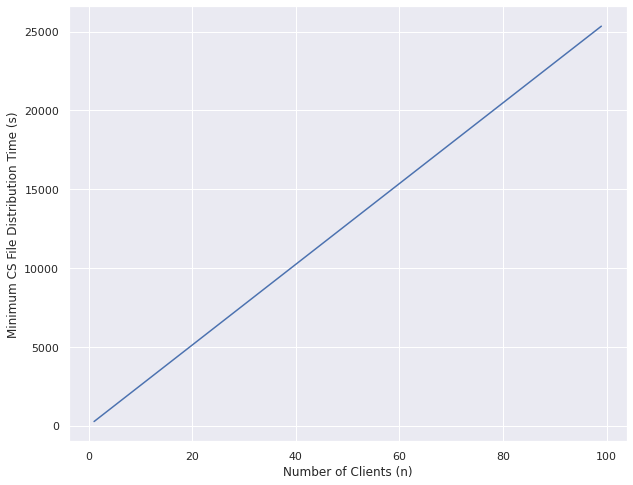

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(list_num_of_clients, data_n_cs)
plt.xlabel('Number of Clients (n)')
plt.ylabel('Minimum CS File Distribution Time (s)')

# Peer-to-Peer

In [ ]:
D_p2p, N, F, Us, dmin, Sig_Ui = sp.symbols("D_{P2P}, N, F, U_s, d_min, \Sigma_U_i")

In [ ]:
time_send_one_copy = F/Us
min_client_download_time = F/dmin
max_upload_rate = Us + Sig_Ui
p2p_max_time = N*F/max_upload_rate

In [ ]:
display(p2p_max_time)

F*N/(U_s + \Sigma_U_i)

In [ ]:
display(
    Markdown(
        'time send one copy = {}'.format(
            sp.latex(time_send_one_copy, mode='inline')
        )
    )
)

display(
    Markdown(
        'minimum client download time = {}'.format(
            sp.latex(min_client_download_time, mode='inline')
        )
    )
)

display(
    Markdown(
        'maximum upload rate = {}'.format(
            sp.latex(max_upload_rate, mode='inline')
        )
    )
)

time send one copy = $F / U_{s}$

minimum client download time = $F / d_{min}$

maximum upload rate = $U_{s} + \Sigma_{U i}$

In [ ]:
eq_lmbd_1 = sp.lambdify((F, Us), time_send_one_copy)
eq_lmbd_2 = sp.lambdify((F, dmin), min_client_download_time)
eq_lmbd_3 = sp.lambdify((N, F, Us, Sig_Ui), p2p_max_time)

In [ ]:
np.random.seed(12)
data_n_p2p = []

for num_client in list_num_of_clients:
  tsoc = eq_lmbd_1(file_size, server_upload_speed)
  mcdt = eq_lmbd_2(file_size, client_download_speed)

  sigui = num_client * client_upload_speed
  
  # sigui = 0
  # for i in range(num_client):
  #   sigui += random.randint(1,5)
    # sigui += 25

  p2pmt = eq_lmbd_3(num_client, file_size, server_upload_speed, sigui)

  data_n_p2p.append(np.max([tsoc, mcdt, p2pmt]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Minimum P2P File Distribution Time (s)')

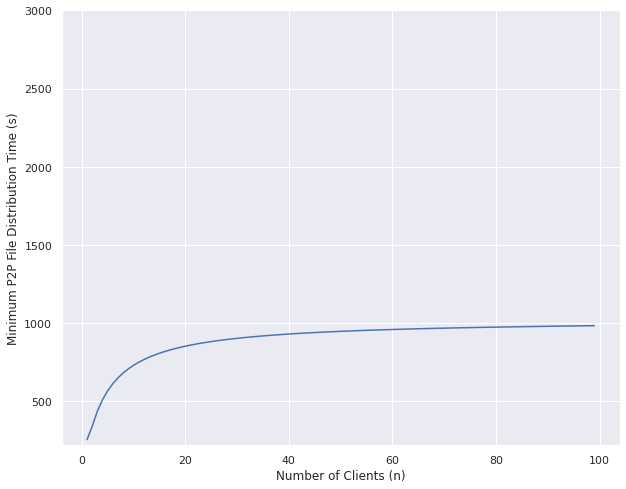

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(list_num_of_clients, data_n_p2p)
plt.ylim(top=3000)
plt.xlabel('Number of Clients (n)')
plt.ylabel('Minimum P2P File Distribution Time (s)')

# Perbandingan CS dan P2P

Text(0, 0.5, 'Minimum File Distribution Time (s)')

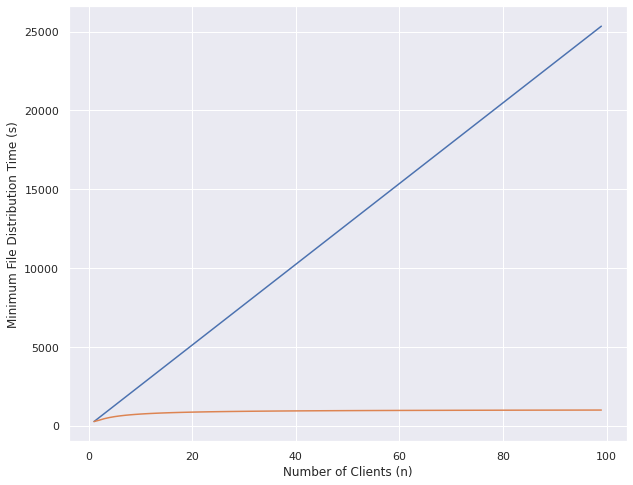

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=list_num_of_clients, y=data_n_cs)
sns.lineplot(x=list_num_of_clients, y=data_n_p2p)

plt.xlabel('Number of Clients (n)')
plt.ylabel('Minimum File Distribution Time (s)')